In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [3]:
data=pd.read_csv("C:/Users/Lenovo/Desktop/tp/clientId_merged_final_no_nan.csv", low_memory=False, index_col="Unnamed: 0")

In [ ]:
#all data used without the SMOTE, fillna- different (median, 0, most frequent, etc.)

In [4]:
data=data.drop(data.index[221], axis=0) #OUTLIER

In [6]:
data.head()

,clientId,conversion_call,call,conversion_feedback,feedback,num_purchase,revenue,avg_visit_revenue,avg_client_revenue,bounce,page_view,session_duration,device,source,browser,time_of_day,purchase,num_visits
0,2837833307332,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0833,2.417,44.0,PC,ad,google/chrome,14.0,0,94.0
1,3055189813388,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.3333,9.333,6.0,TV,ad,google/chrome,14.0,0,5.0
2,15796091665722,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0000,7.000,11.0,tablet,email,yandex,14.0,0,11.0
3,15797642028966,0.0,0,0.0,0,0.0,0.0,0.0,0.0,1.0000,1.000,0.0,PC,ad,opera,14.0,0,2.0
4,157676507646810,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0000,1.667,47.0,tablet,ad,google/chrome,14.0,0,5.0


In [6]:
data.shape #initial size of dataset

(99920, 18)

In [5]:
data.bounce=abs(data.bounce)

In [11]:
data[data.call>0]

,clientId,conversion_call,call,conversion_feedback,feedback,num_purchase,revenue,avg_visit_revenue,avg_client_revenue,bounce,page_view,session_duration,device,source,browser,time_of_day,purchase,num_visits
65,1579779580147476,0.1429,1,0.0,0,0.0,0.0,0.000,0.000,0.166700,1.833000,43.000000,Mobile,ad,yandex,14.0,0,18.0
87,1582227119489693,0.1000,1,0.0,0,0.0,0.0,0.000,0.000,0.125000,5.291500,38.500000,Mobile,email,other,13.0,0,48.0
97,1584083260281139,0.4000,1,0.0,0,2.0,12660.0,1266.000,6330.000,0.250000,19.500000,30.000000,PC,ad,yandex,14.0,1,12.0
178,15577600936790266,0.0938,1,0.0,0,48.0,84546.6,220.173,1761.388,0.027767,15.789667,12.666667,PC,email,yandex,14.0,1,218.0
276,15711190204636852,0.0323,1,0.0,0,2.0,4893.1,78.921,2446.550,0.161300,7.484000,3.000000,Mobile,email,other,15.0,1,93.0
305,15732211543404154,0.0435,1,0.0,0,0.0,0.0,0.000,0.000,0.136400,4.591000,10.000000,Mobile,link,google/chrome,16.0,0,88.0
905,15835963903232588,0.1000,1,0.0,0,0.0,0.0,0.000,0.000,0.222200,1.333000,41.000000,Mobile,ad,yandex,14.0,0,36.0
3026,157210847218847968,0.3333,1,0.0,0,0.0,0.0,0.000,0.000,1.000000,1.000000,0.000000,Mobile,ad,other,14.0,0,2.0
8449,158210927832919104,0.2500,1,0.0,0,1.0,1390.1,347.525,1390.100,0.000000,8.500000,49.000000,Mobile,ad,safari,14.0,1,6.0
11248,158788369353337440,0.5000,1,0.0,0,0.0,0.0,0.000,0.000,0.000000,4.500000,54.000000,tablet,ad,yandex,14.0,0,6.0


<h1 style="font-size:45px;"> Descriptive statistics</h1>


In [13]:
data.iloc[:,1:].describe()

,conversion_call,call,conversion_feedback,feedback,num_purchase,revenue,avg_visit_revenue,avg_client_revenue,bounce,page_view,session_duration,time_of_day,purchase,num_visits
count,99920.000000,99920.000000,99920.000000,99920.000000,99920.000000,9.992000e+04,99920.000000,99920.000000,99920.000000,99920.000000,99920.000000,99920.000000,99920.000000,99920.000000
mean,0.000021,0.000110,0.000002,0.000020,0.675550,1.308095e+03,38.159418,252.786216,0.220261,4.958291,25.459803,13.951551,0.137910,24.189652
std,0.002550,0.010492,0.000462,0.004474,4.313117,1.079232e+04,161.051948,878.202175,0.325041,6.531725,17.823646,2.857113,0.344808,78.175698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.333000,10.000000,14.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.045500,2.667000,25.000000,14.000000,0.000000,6.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.294100,5.812500,40.000000,14.000000,0.000000,17.000000
max,0.500000,1.000000,0.142900,1.000000,384.000000,1.604638e+06,6025.050000,26475.000000,1.000000,137.857000,59.000000,23.000000,1.000000,4376.000000


In [7]:
descr=['num_visits', 'call', 'num_purchase', 'bounce', 'page_view', 'session_duration','source', 'time_of_day', 'purchase' ]

In [19]:
des_stat=data[descr].describe().style.format("{:.5f}")
des_stat

,num_visits,call,num_purchase,bounce,page_view,session_duration,time_of_day,purchase
count,99920.00000,99920.00000,99920.00000,99920.00000,99920.00000,99920.00000,99920.00000,99920.00000
mean,24.18965,0.00011,0.67555,0.22026,4.95829,25.45980,13.95155,0.13791
std,78.17570,0.01049,4.31312,0.32504,6.53172,17.82365,2.85711,0.34481
min,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,4.00000,0.00000,0.00000,0.00000,1.33300,10.00000,14.00000,0.00000
50%,6.00000,0.00000,0.00000,0.04550,2.66700,25.00000,14.00000,0.00000
75%,17.00000,0.00000,0.00000,0.29410,5.81250,40.00000,14.00000,0.00000
max,4376.00000,1.00000,384.00000,1.00000,137.85700,59.00000,23.00000,1.00000


In [20]:
data.loc[:,descr].groupby('source').mean().style.format("{:.5f}")

,num_visits,call,num_purchase,bounce,page_view,session_duration,time_of_day,purchase
source,,,,,,,,
ad,19.10199,0.00009,0.41838,0.25731,4.33548,24.51399,13.96643,0.11073
cached,8.00000,0.00000,0.00000,0.00000,1.87500,29.00000,14.00000,0.00000
direct,38.25871,0.00000,1.40623,0.11774,6.47868,28.28858,13.96071,0.21868
email,43.40694,0.00045,2.09470,0.06933,7.10252,29.20785,13.85200,0.29422
internal,61.92188,0.00000,1.72433,0.11878,5.22378,27.37039,13.86607,0.21317
link,37.16657,0.00020,1.04793,0.07792,6.36181,29.11767,13.91662,0.15587
recommendation systems,38.50000,0.00000,2.33333,0.05797,5.99175,25.16667,15.00000,0.33333
search,48.59750,0.00000,1.76383,0.08015,8.92844,29.17831,13.90417,0.27350
social networks,33.45289,0.00000,1.18275,0.07983,6.79534,29.15409,13.96481,0.15664


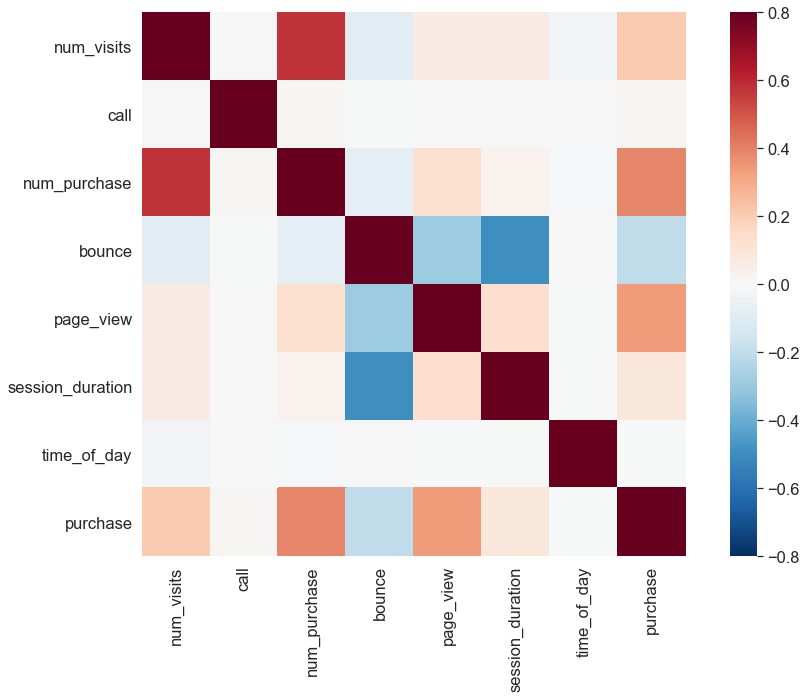

In [21]:
sns.set(font_scale=1.5)
#correlation matrix
corrmat = data.loc[:,descr].corr()
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True,  cmap='RdBu_r');

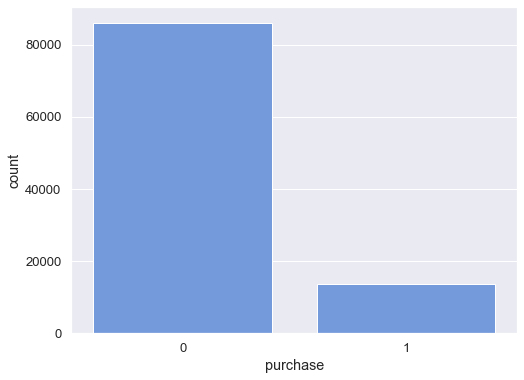

In [260]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.countplot(data.purchase, color='cornflowerblue');

In [23]:
data['purchase'].value_counts(normalize=True)*100

0    86.208967
1    13.791033
Name: purchase, dtype: float64

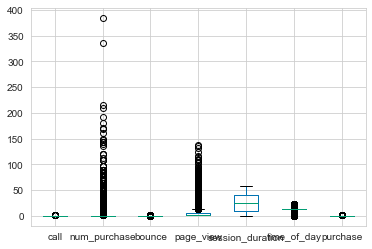

In [10]:
data[descr[1:]].plot(kind='box')
plt.show()

<h1 style="font-size:45px;"> Hypothesis 1</h1>


H1: User website behaviour  is positively related to purchase decision
Features: session duration, bounce, page_view
Predicting: num_purchase

<Figure size 1440x1440 with 0 Axes>

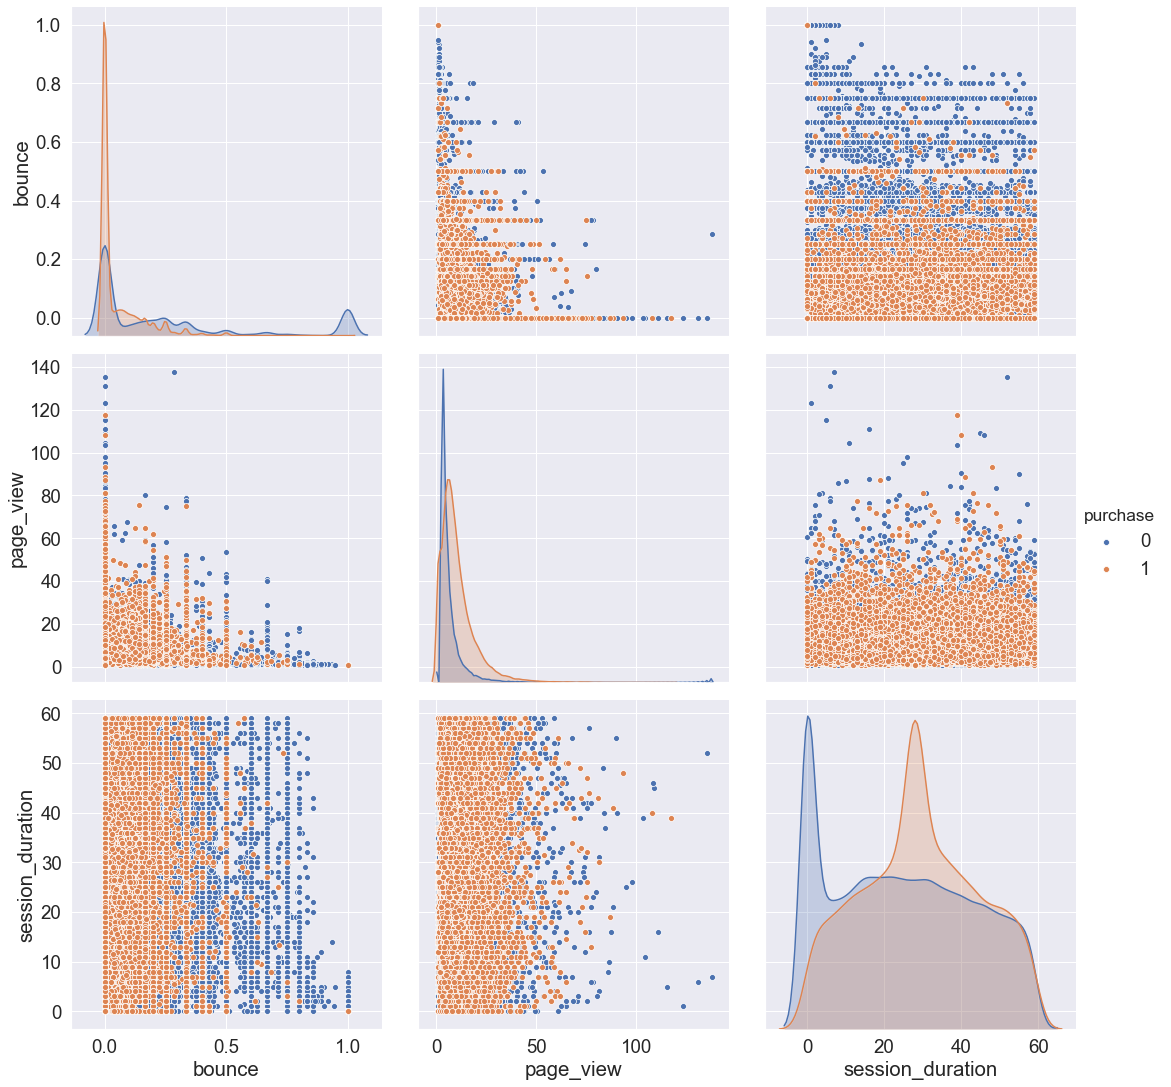

In [165]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.7)
sns.pairplot(data[['bounce',  "page_view", "session_duration", "purchase",]], hue='purchase', height=5);

In [11]:
Xh1_features=['session_duration','bounce',"page_view"]
Xh1=data[Xh1_features]
y=data['purchase']
Xh1.shape,y.shape

((99920, 3), (99920,))

In [12]:
import statsmodels.api as sm

In [13]:
#fitting the logit model variable -by- variable and gathering the data 
var=[]
dic_full={}

for i in Xh1_features:
    var.append(i)
    Xh1=data[var]
    logit_model=sm.Logit(y, Xh1, method='nm')
    result=logit_model.fit()
    dic={}
    for i in range(len(var)):
        dic[var[i]]={}
        dic[var[i]]=(round(result.params[i],4),result.pvalues[i])
    key="model_"+str(i+1)
    dic_full[key]=dic
    print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.515434
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.285     
Dependent Variable: purchase         AIC:              103006.2385
Date:               2020-05-25 13:41 BIC:              103015.7507
No. Observations:   99920            Log-Likelihood:   -51502.    
Df Model:           0                LL-Null:          -40083.    
Df Residuals:       99919            LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
session_duration -0.0477   0.0003 -152.6080 0.0000 -0.0483 -0.0471

Optimization terminated successfully.
         Curre

In [14]:
#cascading results 
cascade_res_h1=pd.DataFrame(dic_full)
print(cascade_res_h1)

                         model_1         model_2         model_3
session_duration  (-0.0477, 0.0)  (-0.0345, 0.0)  (-0.0426, 0.0)
bounce                       NaN  (-5.9395, 0.0)  (-6.0119, 0.0)
page_view                    NaN             NaN   (0.0427, 0.0)


In [15]:
#presentation copypaste
result.params.to_clipboard()

In [16]:
result.pvalues.to_clipboard() 

In [30]:
#confidence interval of coeffs
print (result.conf_int())
#Overall the relationships between the behavioural features and probability of making a 
#positive purchasing decision is negative for session duration and bounce rate, but positively 
#related to number of page viewed

                         0         1
session_duration -0.043395 -0.041832
bounce           -6.165570 -5.858200
page_view         0.040444  0.044880


In [32]:
# odds ratios only
print (np.exp(result.params))
#The odds of person making a decision to purchase:

#*decreses by about 5% with each additional second spent on the website 
#*decrease almost 99.9% with  1% increase in bounce rate (obvious)
#*increse a bit 0.04% with every additional page viewed by the client. 

session_duration    0.958282
bounce              0.002449
page_view           1.043585
dtype: float64


In [33]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                      2.5%     97.5%        OR
session_duration  0.957534  0.959031  0.958282
bounce            0.002101  0.002856  0.002449
page_view         1.041273  1.045902  1.043585


In [34]:
#Fitting other models
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xh1, y, test_size=0.3, random_state=0)

In [35]:
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(X_train, y_train)#fitting the logistic regression
y_pred = logreg.predict(X_test)
auclogit_test=logreg.score(X_test, y_test) #evaluating the accuracy
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(auclogit_test))

Accuracy of logistic regression classifier on test set: 0.8600


In [36]:
from sklearn.model_selection import cross_val_score
cv2 = cross_val_score(logreg, Xh1, y, cv=10) #we apply 10-fold cross validation
logit_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv {:.4f}".format(cv2, logit_cv_test))

Accuracy scores: [0.85938751 0.86269015 0.86178943 0.86208967 0.86719376 0.85908727
 0.85758607 0.85798639 0.86188951 0.86098879]
Mean accuracy score of 10-fold cv 0.8611


In [37]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Xh1, y, test_size=0.30, random_state=5) 
#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#train the model using the training sets 
clf.fit(X_train,y_train)
#prediction on test set
y_pred=clf.predict(X_test)
aucrf=metrics.accuracy_score(y_test, y_pred)
#scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#model accuracy
print("Accuracy of random forest model:{:.4f}".format(aucrf)) 

Accuracy of random forest model:0.8620


In [38]:
cv2 = cross_val_score(clf, Xh1, y, cv=10) #we apply 10-fold cross validation
rf_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for RF: {:.4f}".format(cv2, rf_cv_test))

Accuracy scores: [0.85818655 0.85488391 0.85228183 0.86349079 0.86809448 0.85858687
 0.85828663 0.86369095 0.8755004  0.86479183]
Mean accuracy score of 10-fold cv for RF: 0.8618


In [39]:
from sklearn.naive_bayes import BernoulliNB #importing the needed bayes type
gnb = BernoulliNB()
gnb.fit(Xh1,y)
aucbnb=gnb.score(Xh1,y)
print("Accuracy of Bernoulli Naive Bayes:", round(aucbnb,4))

Accuracy of Bernoulli Naive Bayes: 0.8621


In [40]:
cv2 = cross_val_score(gnb, Xh1, y, cv=10) #we apply 10-fold cross validation
gnb_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for BNB:  {:.4f}".format(cv2, gnb_cv_test))

Accuracy scores: [0.86208967 0.86208967 0.86208967 0.86208967 0.86208967 0.86208967
 0.86208967 0.86208967 0.86208967 0.86208967]
Mean accuracy score of 10-fold cv for BNB:  0.8621


In [41]:
from sklearn.neighbors import KNeighborsClassifier #importing the function
knn5 = KNeighborsClassifier(n_neighbors=5) #we use first model with 5 of nearest neighbors  (as default)
knn5.fit(Xh1,y)
knn5score=knn5.score(Xh1,y)
print("Accuracy of k-NN (nn=5):", round(knn5score,4))

Accuracy of k-NN (nn=5): 0.8998


In [42]:
knn5_cv = cross_val_score(knn5, Xh1,y,cv=10) #we apply 10-fold cross validation

print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=5):{:.4f}".format(knn5_cv, np.mean(knn5_cv)))

Accuracy scores: [0.85398319 0.85588471 0.85368295 0.86178943 0.86359087 0.85828663
 0.85618495 0.86689351 0.8770016  0.86589271]
Mean cv-10 score for k-NN (k=5):0.8613


In [43]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(Xh1,y)
knn3score=knn3.score(Xh1,y)
print("Accuracy of k-NN (nn=3):", round(knn3score,4))

Accuracy of k-NN (nn=3): 0.9141


In [44]:
knn3_cv = cross_val_score(knn3, Xh1, y, cv=10) #we apply 5-fold cross validation
print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=3) {:.4f}".format(knn3_cv,np.mean(knn3_cv)))

Accuracy scores: [0.84947958 0.84457566 0.84827862 0.85888711 0.85568455 0.85608487
 0.85268215 0.85928743 0.87179744 0.85988791]
Mean cv-10 score for k-NN (k=3) 0.8557


In [45]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh1,y)
auc_gbc=clf.score(Xh1,y)
print("Accuracy score of Gradient Boosted classifier for the whole dataset: {:.4f}".format(auc_gbc))


Accuracy score of Gradient Boosted classifier for the whole dataset: 0.8804


In [46]:
cv2 = cross_val_score(clf, Xh1, y, cv=10) #we apply 10-fold cross validation
gbc_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  {:.4f}".format(cv2, gbc_cv_test))

Accuracy scores: [0.87389912 0.87770216 0.87379904 0.87870296 0.87910328 0.87510008
 0.8765012  0.88090472 0.88580865 0.88420737]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  0.8786


In [47]:
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(Xh1,y)#fitting the logistic regression
y_pred = logreg.predict(Xh1)
auclogit_full=logreg.score(Xh1, y) #evaluating the accuracy
print('Accuracy of logistic regression classifier on full dataset: {:.4f}'.format(auclogit_full))

Accuracy of logistic regression classifier on full dataset: 0.8609


In [48]:

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)
clf.predict(X_test)

auc_gbc_test=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier for test set: {:.4f}".format(auc_gbc_test))

Accuracy score of Gradient Boosted classifier for test set: 0.8816


In [49]:
cv2 = cross_val_score(clf, Xh1, y, cv=10) #we apply 10-fold cross validation
gbc_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  {:.4f}".format(cv2, gbc_test_cv_test))

Accuracy scores: [0.87389912 0.87770216 0.87379904 0.87870296 0.87910328 0.87510008
 0.8765012  0.88090472 0.88580865 0.88420737]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  0.8786


In [50]:
y_pred=logreg.predict(X_train)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_pred)
clf.predict(X_test)

auc_gbc_logit_train=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: 0.8626


In [51]:
cv2 = cross_val_score(clf, Xh1, y, cv=10) #we apply 10-fold cross validation
gbc_logit_train_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  {:.4f}".format(cv2, gbc_logit_train_test_cv_test))

Accuracy scores: [0.87389912 0.87770216 0.87379904 0.87870296 0.87910328 0.87510008
 0.8765012  0.88090472 0.88580865 0.88420737]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  0.8786


In [52]:
y_pred = logreg.predict(Xh1)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh1,y_pred)
clf.predict(Xh1)

auc_gbb_logit_full=clf.score(Xh1,y)
print("Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: 0.8626


In [53]:
cv2 = cross_val_score(clf, Xh1, y, cv=10) #we apply 10-fold cross validation
gbb_logit_full_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  {:.4f}".format(cv2, gbb_logit_full_cv_test))

Accuracy scores: [0.87389912 0.87770216 0.87379904 0.87870296 0.87910328 0.87510008
 0.8765012  0.88090472 0.88580865 0.88420737]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  0.8786


In [54]:
#H1 results
res={"Logistic regression on 70-30":{"AUC":auclogit_test, "CV":logit_cv_test}, "Logistic regression on whole dataset":{"AUC":auclogit_full, "CV": logit_cv_test}, "Random forest":{"AUC":aucrf, "CV": rf_cv_test}, "Bernoulli NB":{"AUC": aucbnb, "CV":gnb_cv_test}, "k-Nearest neighbors, k=5": {"AUC": knn5score, "CV":np.mean(knn5_cv)},"k-Nearest neighbors, k=3": {"AUC": knn3score, "CV":np.mean(knn3_cv)}, "Gradient boosted classifier for the whole set":{"AUC":auc_gbc, 'CV':gbc_cv_test},  "Gradient boosted classifier for the whole set":{"AUC": auc_gbc_test, "CV":gbc_test_cv_test}, "Gradient boosted classifier test set results trained on logistic reg":{"AUC":auc_gbc_logit_train, "CV": gbc_logit_train_test_cv_test},  "Gradient boosted classifier  results trained on full logistic reg predictions":{"AUC": auc_gbc_logit_train,'CV':gbb_logit_full_cv_test }}
results_h1=pd.DataFrame(res) #making the dataframe out of the dictionary, all variables used will be rerecorded 
results_h1 #printing the dataframe

,Logistic regression on 70-30,Logistic regression on whole dataset,Random forest,Bernoulli NB,"k-Nearest neighbors, k=5","k-Nearest neighbors, k=3",Gradient boosted classifier for the whole set,Gradient boosted classifier test set results trained on logistic reg,Gradient boosted classifier results trained on full logistic reg predictions
AUC,0.859988,0.860889,0.861956,0.86209,0.899820,0.914051,0.881605,0.862557,0.862557
CV,0.861069,0.861069,0.861779,0.86209,0.861319,0.855665,0.878573,0.878573,0.878573


<h1 style="font-size:45px;"> Hypothesis 2</h1>


H2: The type of online channel is positively related to purchase decision

Features: session duration, bounce, page_view, source
Predicting: num_purchase


In [17]:
Xh2_features=['session_duration', 'bounce', 'page_view', 'source']
Xh2=data[Xh2_features]
y=data['purchase']
Xh2.shape,y.shape

((99920, 4), (99920,))

In [18]:
Xh2=pd.get_dummies(Xh2)
Xh2.head()

,session_duration,bounce,page_view,source_ad,source_cached,source_direct,source_email,source_internal,source_link,source_recommendation systems,source_search,source_social networks
0,44.0,0.0833,2.417,1,0,0,0,0,0,0,0,0
1,6.0,0.3333,9.333,1,0,0,0,0,0,0,0,0
2,11.0,0.0000,7.000,0,0,0,1,0,0,0,0,0
3,0.0,1.0000,1.000,1,0,0,0,0,0,0,0,0
4,47.0,0.0000,1.667,1,0,0,0,0,0,0,0,0


In [58]:
Xh2.columns

Index(['session_duration', 'bounce', 'page_view', 'source_ad', 'source_cached',
       'source_direct', 'source_email', 'source_internal', 'source_link',
       'source_recommendation systems', 'source_search',
       'source_social networks'],
      dtype='object')

In [19]:
Xh2_features_dum=Xh2.columns

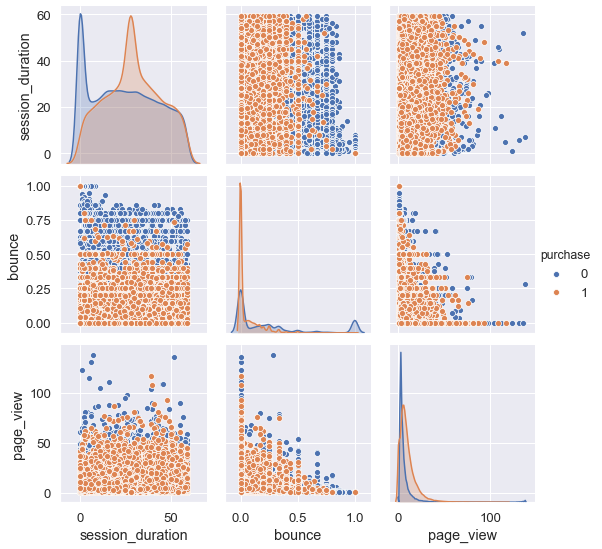

In [60]:

plot_features=Xh2_features+["purchase"]
sns.pairplot(data[plot_features], hue='purchase');

In [20]:
Xh2_features= Xh2.columns.values.tolist()
print(Xh2_features)

['session_duration', 'bounce', 'page_view', 'source_ad', 'source_cached', 'source_direct', 'source_email', 'source_internal', 'source_link', 'source_recommendation systems', 'source_search', 'source_social networks']


In [21]:
#fitting the logit model variable -by- variable and gathering the data 
var=[]
dic_full={}

for i in Xh2_features:
    var.append(i)
    Xh2_t=Xh2[var]
    logit_model=sm.Logit(y, Xh2_t, method='nm')
    result=logit_model.fit_regularized()
    dic={}
    for i in range(len(var)):
        dic[var[i]]={}
        dic[var[i]]=(round(result.params[i],4),round(result.pvalues[i],4))
    key="model_"+str(i+1)
    dic_full[key]=dic
    print(result.summary2())


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5154335395273997
            Iterations: 7
            Function evaluations: 12
            Gradient evaluations: 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.285     
Dependent Variable: purchase         AIC:              103006.2385
Date:               2020-05-25 13:45 BIC:              103015.7507
No. Observations:   99920            Log-Likelihood:   -51502.    
Df Model:           0                LL-Null:          -40083.    
Df Residuals:       99919            LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
session_durat

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: purchase         AIC:              71422.5659
Date:               2020-05-25 13:45 BIC:              71489.1507
No. Observations:   99920            Log-Likelihood:   -35704.   
Df Model:           6                LL-Null:          -40083.   
Df Residuals:       99913            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     37.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
session_duration -0.0218   0.0005 -45.6536 0.0000 -0.0228 -0.0209
bounce           -4.3510   0.0778 -55.9538 0.0000 -4.5034 -4.1986
page_view         0.0608   0.0012  49.5190 0.0000  0.0584  0.0633
source_ad        -1.2978   0.0176 -7

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.33616453344186414
            Iterations: 90
            Function evaluations: 95
            Gradient evaluations: 90
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.162     
Dependent Variable:      purchase             AIC:                  67203.1204
Date:                    2020-05-25 13:45     BIC:                  67317.2659
No. Observations:        99920                Log-Likelihood:       -33590.   
Df Model:                11                   LL-Null:              -40083.   
Df Residuals:            99908                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          90.0000                                              
------------------------------------------------------------------------------
                              

In [22]:
cascade_res_h2=pd.DataFrame(dic_full)
cascade_res_h2

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12
session_duration,"(-0.0477, 0.0)","(-0.0345, 0.0)","(-0.0426, 0.0)","(-0.0249, 0.0)","(-0.0249, 0.0)","(-0.0243, 0.0)","(-0.0218, 0.0)","(-0.0213, 0.0)","(-0.0144, 0.0)","(-0.0144, 0.0)","(-0.0028, 0.0)","(0.0011, 0.0783)"
bounce,NaN,"(-5.9396, 0.0)","(-6.0119, 0.0)","(-4.4997, 0.0)","(-4.4997, 0.0)","(-4.4672, 0.0)","(-4.351, 0.0)","(-4.3122, 0.0)","(-4.0062, 0.0)","(-4.0062, 0.0)","(-3.3865, 0.0)","(-3.2017, 0.0)"
page_view,NaN,NaN,"(0.0427, 0.0)","(0.0571, 0.0)","(0.0571, 0.0)","(0.0578, 0.0)","(0.0608, 0.0)","(0.0613, 0.0)","(0.0689, 0.0)","(0.0689, 0.0)","(0.0876, 0.0)","(0.0927, 0.0)"
source_ad,NaN,NaN,NaN,"(-1.1874, 0.0)","(-1.1874, 0.0)","(-1.2091, 0.0)","(-1.2978, 0.0)","(-1.3169, 0.0)","(-1.5657, 0.0)","(-1.5657, 0.0)","(-2.0546, 0.0)","(-2.214, 0.0)"
source_cached,NaN,NaN,NaN,NaN,"(-0.0015, 0.9992)","(-0.005, 0.9973)","(-0.0056, 0.997)","(-0.0101, 0.9946)","(-0.0122, 0.9932)","(-0.0122, 0.9932)","(-1.0169, 0.5176)","(-1.0428, 0.4984)"
source_direct,NaN,NaN,NaN,NaN,NaN,"(-0.7113, 0.0)","(-0.8057, 0.0)","(-0.8251, 0.0)","(-1.0867, 0.0)","(-1.0867, 0.0)","(-1.5934, 0.0)","(-1.7556, 0.0)"
source_email,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.4807, 0.0)","(-0.5005, 0.0)","(-0.7615, 0.0)","(-0.7615, 0.0)","(-1.2632, 0.0)","(-1.4231, 0.0)"
source_internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.7537, 0.0)","(-0.993, 0.0)","(-0.9931, 0.0)","(-1.455, 0.0)","(-1.6044, 0.0)"
source_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-1.5803, 0.0)","(-1.5803, 0.0)","(-2.0781, 0.0)","(-2.2389, 0.0)"
source_recommendation systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.0102, 0.9902)","(-1.3298, 0.1564)","(-1.4651, 0.1183)"


In [23]:
#presentation copypaste
result.params.to_clipboard()

In [25]:
result.pvalues.to_clipboard()

In [65]:
#confidence interval of coeffs
print (result.conf_int())

                                      0         1
session_duration              -0.000122  0.002274
bounce                        -3.353501 -3.049950
page_view                      0.089903  0.095464
source_ad                     -2.263000 -2.164955
source_cached                 -4.061621  1.976079
source_direct                 -1.903087 -1.608149
source_email                  -1.493337 -1.352937
source_internal               -1.780230 -1.428637
source_link                   -2.330391 -2.147423
source_recommendation systems -3.303315  0.373156
source_search                 -1.790973 -1.635938
source_social networks        -2.511145 -2.112243


In [67]:
result.pvalues

session_duration                  7.834757e-02
bounce                            0.000000e+00
page_view                         0.000000e+00
source_ad                         0.000000e+00
source_cached                     4.983993e-01
source_direct                    2.032913e-120
source_email                      0.000000e+00
source_internal                   1.465238e-71
source_link                       0.000000e+00
source_recommendation systems     1.182649e-01
source_search                     0.000000e+00
source_social networks           3.075291e-114
dtype: float64

In [159]:
np.exp(result.params).to_clipboard(decimal=",")

In [70]:
# odds ratios only
print (np.exp(result.params))

session_duration                 1.001077
bounce                           0.040692
page_view                        1.097114
source_ad                        0.109265
source_cached                    0.352477
source_direct                    0.172800
source_email                     0.240957
source_internal                  0.201003
source_link                      0.106575
source_recommendation systems    0.231060
source_search                    0.180242
source_social networks           0.099093
dtype: float64


In [71]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                                   2.5%     97.5%        OR
session_duration               0.999878  1.002277  1.001077
bounce                         0.034962  0.047361  0.040692
page_view                      1.094068  1.100169  1.097114
source_ad                      0.104038  0.114755  0.109265
source_cached                  0.017221  7.214402  0.352477
source_direct                  0.149108  0.200258  0.172800
source_email                   0.224622  0.258480  0.240957
source_internal                0.168599  0.239635  0.201003
source_link                    0.097258  0.116785  0.106575
source_recommendation systems  0.036761  1.452310  0.231060
source_search                  0.166798  0.194770  0.180242
source_social networks         0.081175  0.120966  0.099093


In [72]:
X_train, X_test, y_train, y_test = train_test_split(Xh2, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(X_train, y_train)#fitting the logistic regression
y_pred = logreg.predict(X_test)
auclogit_test=logreg.score(X_test, y_test) #evaluating the accuracy
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(auclogit_test))

Accuracy of logistic regression classifier on test set: 0.8605


In [73]:
from sklearn.model_selection import cross_val_score
cv2 = cross_val_score(logreg, Xh2, y, cv=10) #we apply 5-fold cross validation
logit_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv {:.4f}".format(cv2, logit_cv_test))

Accuracy scores: [0.86008807 0.86499199 0.86279023 0.86339071 0.86609287 0.86008807
 0.85648519 0.85998799 0.86118895 0.86068855]
Mean accuracy score of 10-fold cv 0.8616


In [74]:
X_train, X_test, y_train, y_test = train_test_split(Xh2, y, test_size=0.30, random_state=5) 
#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#train the model using the training sets 
clf.fit(X_train,y_train)
#prediction on test set
y_pred=clf.predict(X_test)
aucrf=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of random forest model:{:.4f}".format(aucrf))

Accuracy of random forest model:0.8636


In [75]:
cv2 = cross_val_score(clf, Xh2, y, cv=10) #we apply 10-fold cross validation
rf_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for RF: {:.4f}".format(cv2, rf_cv_test))

Accuracy scores: [0.85718575 0.85448359 0.85518415 0.86639311 0.86779424 0.86559247
 0.85898719 0.86729384 0.87580064 0.86419135]
Mean accuracy score of 10-fold cv for RF: 0.8633


In [76]:
gnb = BernoulliNB()
gnb.fit(Xh2,y)
aucbnb=gnb.score(Xh2,y)
print("Accuracy of Bernoulli Naive Bayes:", round(aucbnb,4))

Accuracy of Bernoulli Naive Bayes: 0.8282


In [77]:
cv2 = cross_val_score(gnb, Xh2, y, cv=10) #we apply 10-fold cross validation
gnb_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for BNB:  {:.4f}".format(cv2, gnb_cv_test))

Accuracy scores: [0.83076461 0.79343475 0.8057446  0.83026421 0.83626902 0.85798639
 0.82195757 0.85518415 0.8513811  0.83646918]
Mean accuracy score of 10-fold cv for BNB:  0.8319


In [78]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(Xh2,y)
knn5score=knn5.score(Xh2,y)
print("Accuracy of k-NN (nn=5):", round(knn5score,4))
knn5_cv = cross_val_score(knn5, Xh2,y,cv=10) 
print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=5):{:.4f}".format(knn5_cv, np.mean(knn5_cv)))

Accuracy of k-NN (nn=5): 0.9001
Accuracy scores: [0.85658527 0.85408327 0.85368295 0.86168935 0.86529223 0.86359087
 0.85788631 0.86989592 0.8704964  0.86539231]
Mean cv-10 score for k-NN (k=5):0.8619


In [79]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(Xh2,y)
knn3score=knn3.score(Xh2,y)
print("Accuracy of k-NN (nn=3):", round(knn3score,4))
knn3_cv = cross_val_score(knn3, Xh2, y, cv=10) 
print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=3) {:.4f}".format(knn3_cv,np.mean(knn3_cv)))

Accuracy of k-NN (nn=3): 0.9164
Accuracy scores: [0.85008006 0.84247398 0.8418735  0.85998799 0.85768615 0.85818655
 0.85388311 0.86008807 0.86929544 0.86248999]
Mean cv-10 score for k-NN (k=3) 0.8556


In [80]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh2,y)
auc_gbc=clf.score(Xh2,y)
print("Accuracy score of Gradient Boosted classifier for the whole dataset: {:.4f}".format(auc_gbc))


Accuracy score of Gradient Boosted classifier for the whole dataset: 0.8816


In [81]:
cv2 = cross_val_score(clf, Xh2, y, cv=10) #we apply 10-fold cross validation
gbc_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  {:.4f}".format(cv2, gbc_cv_test))

Accuracy scores: [0.87620096 0.87920336 0.87640112 0.88080464 0.88260608 0.87820256
 0.87510008 0.88460769 0.88640913 0.88190552]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  0.8801


In [82]:
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(Xh2,y)#fitting the logistic regression
y_pred = logreg.predict(Xh2)
auclogit_full=logreg.score(Xh2, y) #evaluating the accuracy
print('Accuracy of logistic regression classifier on full dataset: {:.4f}'.format(auclogit_full))

Accuracy of logistic regression classifier on full dataset: 0.8616


In [83]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)
clf.predict(X_test)
auc_gbc_test=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier for test set: {:.4f}".format(auc_gbc_test))

Accuracy score of Gradient Boosted classifier for test set: 0.8822


In [84]:
cv2 = cross_val_score(clf, Xh2, y, cv=10) #we apply 10-fold cross validation
gbc_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  {:.4f}".format(cv2, gbc_test_cv_test))

Accuracy scores: [0.87620096 0.87920336 0.87640112 0.88080464 0.88260608 0.87820256
 0.87510008 0.88460769 0.88640913 0.88190552]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  0.8801


In [85]:
y_pred=logreg.predict(X_train)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_pred)
clf.predict(X_test)
auc_gbc_logit_train=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: 0.8635


In [86]:
cv2 = cross_val_score(clf, Xh2, y, cv=10) #we apply 10-fold cross validation
gbc_logit_train_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  {:.4f}".format(cv2, gbc_logit_train_test_cv_test))

Accuracy scores: [0.87620096 0.87920336 0.87640112 0.88080464 0.88260608 0.87820256
 0.87510008 0.88460769 0.88640913 0.88190552]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  0.8801


In [87]:
y_pred = logreg.predict(Xh2)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh2,y_pred)
clf.predict(Xh2)
auc_gbb_logit_full=clf.score(Xh2,y)
print("Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: 0.8635


In [88]:
cv2 = cross_val_score(clf, Xh2, y, cv=10) #we apply 10-fold cross validation
gbb_logit_full_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  {:.4f}".format(cv2, gbb_logit_full_cv_test))

Accuracy scores: [0.87620096 0.87920336 0.87640112 0.88080464 0.88260608 0.87820256
 0.87510008 0.88460769 0.88640913 0.88190552]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  0.8801


In [89]:
#H2 results
res={"Logistic regression on 70-30":{"AUC":auclogit_test, "CV":logit_cv_test}, "Logistic regression on whole dataset":{"AUC":auclogit_full, "CV": logit_cv_test}, "Random forest":{"AUC":aucrf, "CV": rf_cv_test}, "Bernoulli NB":{"AUC": aucbnb, "CV":gnb_cv_test}, "k-Nearest neighbors, k=5": {"AUC": knn5score, "CV":np.mean(knn5_cv)},"k-Nearest neighbors, k=3": {"AUC": knn3score, "CV":np.mean(knn3_cv)}, "Gradient boosted classifier for the whole set":{"AUC":auc_gbc, 'CV':gbc_cv_test},  "Gradient boosted classifier for the whole set":{"AUC": auc_gbc_test, "CV":gbc_test_cv_test}, "Gradient boosted classifier test set results trained on logistic reg":{"AUC":auc_gbc_logit_train, "CV": gbc_logit_train_test_cv_test},  "Gradient boosted classifier  results trained on full logistic reg predictions":{"AUC": auc_gbc_logit_train,'CV':gbb_logit_full_cv_test }}
results_h2=pd.DataFrame(res) #making the dataframe out of the dictionary, all variables used will be rerecorded 
results_h2 #printing the dataframe

,Logistic regression on 70-30,Logistic regression on whole dataset,Random forest,Bernoulli NB,"k-Nearest neighbors, k=5","k-Nearest neighbors, k=3",Gradient boosted classifier for the whole set,Gradient boosted classifier test set results trained on logistic reg,Gradient boosted classifier results trained on full logistic reg predictions
AUC,0.860522,0.861649,0.863591,0.828163,0.900100,0.916393,0.882206,0.863524,0.863524
CV,0.861579,0.861579,0.863291,0.831946,0.861859,0.855604,0.880144,0.880144,0.880144


<h1 style="font-size:45px;"> Hypothesis 3</h1>


H3: Feedback request is positively related to purchase decision

Features: session duration, bounce, page_view, source, source, feedback Predicting: num_purchase

In [26]:
Xh3_features=['session_duration','bounce',"page_view", 'source', 'feedback']
Xh3=data[Xh3_features]
y=data['purchase']
Xh3.shape,y.shape

((99920, 5), (99920,))

In [27]:
Xh3=pd.get_dummies(Xh3)
Xh3.head()

,session_duration,bounce,page_view,feedback,source_ad,source_cached,source_direct,source_email,source_internal,source_link,source_recommendation systems,source_search,source_social networks
0,44.0,0.0833,2.417,0,1,0,0,0,0,0,0,0,0
1,6.0,0.3333,9.333,0,1,0,0,0,0,0,0,0,0
2,11.0,0.0000,7.000,0,0,0,0,1,0,0,0,0,0
3,0.0,1.0000,1.000,0,1,0,0,0,0,0,0,0,0
4,47.0,0.0000,1.667,0,1,0,0,0,0,0,0,0,0


In [28]:
Xh3_features= Xh3.columns.values.tolist()
print(Xh3_features)

['session_duration', 'bounce', 'page_view', 'feedback', 'source_ad', 'source_cached', 'source_direct', 'source_email', 'source_internal', 'source_link', 'source_recommendation systems', 'source_search', 'source_social networks']


In [29]:
#fitting the logit model variable -by- variable and gathering the data 
var=[]
dic_full={}

for i in Xh3_features:
    var.append(i)
    Xh3_t=Xh3[var]
    logit_model=sm.Logit(y, Xh3_t, method='nm')
    result=logit_model.fit_regularized()
    dic={}
    for i in range(len(var)):
        dic[var[i]]={}
        dic[var[i]]=(round(result.params[i],4),round(result.pvalues[i],4))
    key="model_"+str(i+1)
    dic_full[key]=dic
    print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5154335395273997
            Iterations: 7
            Function evaluations: 12
            Gradient evaluations: 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.285     
Dependent Variable: purchase         AIC:              103006.2385
Date:               2020-05-25 13:48 BIC:              103015.7507
No. Observations:   99920            Log-Likelihood:   -51502.    
Df Model:           0                LL-Null:          -40083.    
Df Residuals:       99919            LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
session_durat

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3585107231892558
            Iterations: 62
            Function evaluations: 68
            Gradient evaluations: 62
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.106     
Dependent Variable:     purchase             AIC:                  71658.7829
Date:                   2020-05-25 13:48     BIC:                  71725.3678
No. Observations:       99920                Log-Likelihood:       -35822.   
Df Model:               6                    LL-Null:              -40083.   
Df Residuals:           99913                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         62.0000                                              
-----------------------------------------------------------------------------
                  Coef.    Std.Err.     z

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.33975952793948183
            Iterations: 109
            Function evaluations: 115
            Gradient evaluations: 109
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.153     
Dependent Variable:         purchase               AIC:                    67921.5441
Date:                       2020-05-25 13:48       BIC:                    68035.6896
No. Observations:           99920                  Log-Likelihood:         -33949.   
Df Model:                   11                     LL-Null:                -40083.   
Df Residuals:               99908                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             109.0000                                                 
-----------------------------------------------

In [30]:
result.params.to_clipboard()

In [31]:
result.pvalues.to_clipboard()

In [94]:
cascade_res_h3=pd.DataFrame(dic_full)
cascade_res_h3

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13
session_duration,"(-0.0477, 0.0)","(-0.0345, 0.0)","(-0.0426, 0.0)","(-0.0426, 0.0)","(-0.0249, 0.0)","(-0.0249, 0.0)","(-0.0243, 0.0)","(-0.0218, 0.0)","(-0.0213, 0.0)","(-0.0144, 0.0)","(-0.0144, 0.0)","(-0.0028, 0.0)","(0.0011, 0.078)"
bounce,NaN,"(-5.9396, 0.0)","(-6.0119, 0.0)","(-6.0122, 0.0)","(-4.5001, 0.0)","(-4.5002, 0.0)","(-4.4677, 0.0)","(-4.3514, 0.0)","(-4.3127, 0.0)","(-4.0067, 0.0)","(-4.0065, 0.0)","(-3.3871, 0.0)","(-3.2022, 0.0)"
page_view,NaN,NaN,"(0.0427, 0.0)","(0.0427, 0.0)","(0.0571, 0.0)","(0.0571, 0.0)","(0.0578, 0.0)","(0.0608, 0.0)","(0.0613, 0.0)","(0.0688, 0.0)","(0.0688, 0.0)","(0.0876, 0.0)","(0.0927, 0.0)"
feedback,NaN,NaN,NaN,"(13.3872, 0.9625)","(13.0612, 0.9644)","(24.0417, 0.9997)","(24.0294, 0.9997)","(21.9132, 0.9993)","(21.5199, 0.9992)","(17.89, 0.9964)","(17.8652, 0.9963)","(17.0704, 0.9931)","(16.0058, 0.9889)"
source_ad,NaN,NaN,NaN,NaN,"(-1.1873, 0.0)","(-1.1874, 0.0)","(-1.2091, 0.0)","(-1.2978, 0.0)","(-1.3168, 0.0)","(-1.5657, 0.0)","(-1.5658, 0.0)","(-2.0546, 0.0)","(-2.214, 0.0)"
source_cached,NaN,NaN,NaN,NaN,NaN,"(-11.6638, 0.9707)","(-11.8549, 0.9727)","(-11.5929, 0.9685)","(-11.5515, 0.9677)","(-11.6805, 0.9664)","(-12.0663, 0.9714)","(-12.4318, 0.9708)","(-12.3725, 0.9682)"
source_direct,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.7111, 0.0)","(-0.8054, 0.0)","(-0.8251, 0.0)","(-1.0866, 0.0)","(-1.0868, 0.0)","(-1.5933, 0.0)","(-1.7555, 0.0)"
source_email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.4806, 0.0)","(-0.5003, 0.0)","(-0.7613, 0.0)","(-0.7615, 0.0)","(-1.2631, 0.0)","(-1.4231, 0.0)"
source_internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.7531, 0.0)","(-0.9926, 0.0)","(-0.9928, 0.0)","(-1.4549, 0.0)","(-1.6044, 0.0)"
source_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-1.5801, 0.0)","(-1.5803, 0.0)","(-2.078, 0.0)","(-2.2388, 0.0)"


In [95]:
#adding a call variable 
Xh3_new=Xh3
Xh3_new['call']=data['call']
Xh3_features_new= Xh3_new.columns.values.tolist()
var=[]
dic_full={}

for i in Xh3_features_new:
    var.append(i)
    Xh3_t=Xh3_new[var]
    logit_model=sm.Logit(y, Xh3_t, method='nm')
    result=logit_model.fit_regularized()
    dic={}
    for i in range(len(var)):
        dic[var[i]]={}
        dic[var[i]]=(round(result.params[i],4),round(result.pvalues[i],4))
    key="model_"+str(i+1)
    dic_full[key]=dic


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5154335395273997
            Iterations: 7
            Function evaluations: 12
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3942873245597926
            Iterations: 15
            Function evaluations: 20
            Gradient evaluations: 15
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3866594916018744
            Iterations: 18
            Function evaluations: 23
            Gradient evaluations: 18
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.38662801967072136
            Iterations: 46
            Function evaluations: 51
            Gradient evaluations: 46
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.35906248530231105
            Iterations: 51
            Functio

In [96]:
cascade_res_h3_new=pd.DataFrame(dic_full)
cascade_res_h3_new  

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
session_duration,"(-0.0477, 0.0)","(-0.0345, 0.0)","(-0.0426, 0.0)","(-0.0426, 0.0)","(-0.0249, 0.0)","(-0.0249, 0.0)","(-0.0243, 0.0)","(-0.0218, 0.0)","(-0.0213, 0.0)","(-0.0144, 0.0)","(-0.0144, 0.0)","(-0.0028, 0.0)","(0.0011, 0.078)","(0.0011, 0.0795)"
bounce,NaN,"(-5.9396, 0.0)","(-6.0119, 0.0)","(-6.0122, 0.0)","(-4.5001, 0.0)","(-4.5002, 0.0)","(-4.4677, 0.0)","(-4.3514, 0.0)","(-4.3127, 0.0)","(-4.0067, 0.0)","(-4.0065, 0.0)","(-3.3871, 0.0)","(-3.2022, 0.0)","(-3.2032, 0.0)"
page_view,NaN,NaN,"(0.0427, 0.0)","(0.0427, 0.0)","(0.0571, 0.0)","(0.0571, 0.0)","(0.0578, 0.0)","(0.0608, 0.0)","(0.0613, 0.0)","(0.0688, 0.0)","(0.0688, 0.0)","(0.0876, 0.0)","(0.0927, 0.0)","(0.0927, 0.0)"
feedback,NaN,NaN,NaN,"(13.3872, 0.9625)","(13.0612, 0.9644)","(24.0417, 0.9997)","(24.0294, 0.9997)","(21.9132, 0.9993)","(21.5199, 0.9992)","(17.89, 0.9964)","(17.8652, 0.9963)","(17.0704, 0.9931)","(16.0058, 0.9889)","(15.9864, 0.9888)"
source_ad,NaN,NaN,NaN,NaN,"(-1.1873, 0.0)","(-1.1874, 0.0)","(-1.2091, 0.0)","(-1.2978, 0.0)","(-1.3168, 0.0)","(-1.5657, 0.0)","(-1.5658, 0.0)","(-2.0546, 0.0)","(-2.214, 0.0)","(-2.2139, 0.0)"
source_cached,NaN,NaN,NaN,NaN,NaN,"(-11.6638, 0.9707)","(-11.8549, 0.9727)","(-11.5929, 0.9685)","(-11.5515, 0.9677)","(-11.6805, 0.9664)","(-12.0663, 0.9714)","(-12.4318, 0.9708)","(-12.3725, 0.9682)","(-12.2385, 0.9663)"
source_direct,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.7111, 0.0)","(-0.8054, 0.0)","(-0.8251, 0.0)","(-1.0866, 0.0)","(-1.0868, 0.0)","(-1.5933, 0.0)","(-1.7555, 0.0)","(-1.7552, 0.0)"
source_email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.4806, 0.0)","(-0.5003, 0.0)","(-0.7613, 0.0)","(-0.7615, 0.0)","(-1.2631, 0.0)","(-1.4231, 0.0)","(-1.4236, 0.0)"
source_internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.7531, 0.0)","(-0.9926, 0.0)","(-0.9928, 0.0)","(-1.4549, 0.0)","(-1.6044, 0.0)","(-1.6041, 0.0)"
source_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-1.5801, 0.0)","(-1.5803, 0.0)","(-2.078, 0.0)","(-2.2388, 0.0)","(-2.2389, 0.0)"


In [97]:
#confidence interval of coeffs
print (result.conf_int())

                                         0            1
session_duration                 -0.000126     0.002270
bounce                           -3.355016    -3.051363
page_view                         0.089880     0.095441
feedback                      -2219.100835  2251.073632
source_ad                        -2.262957    -2.164907
source_cached                  -580.786754   556.309800
source_direct                    -1.902706    -1.607772
source_email                     -1.493821    -1.353403
source_internal                  -1.779936    -1.428340
source_link                      -2.330431    -2.147466
source_recommendation systems    -2.831172     0.604265
source_search                    -1.791419    -1.636354
source_social networks           -2.510743    -2.111849
call                              0.253474     2.872211


In [155]:
np.exp(result.params).to_clipboard(decimal=',')

In [99]:
# odds ratios only
print (np.exp(result.params))

session_duration                 1.001073e+00
bounce                           4.063240e-02
page_view                        1.097089e+00
feedback                         8.766067e+06
source_ad                        1.092702e-01
source_cached                    4.840574e-06
source_direct                    1.728659e-01
source_email                     2.408425e-01
source_internal                  2.010628e-01
source_link                      1.065705e-01
source_recommendation systems    3.284229e-01
source_search                    1.801643e-01
source_social networks           9.913271e-02
call                             4.772367e+00
dtype: float64


In [100]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                                        2.5%          97.5%            OR
session_duration                9.998738e-01   1.002273e+00  1.001073e+00
bounce                          3.490881e-02   4.729441e-02  4.063240e-02
page_view                       1.094043e+00   1.100144e+00  1.097089e+00
feedback                        0.000000e+00            inf  8.766067e+06
source_ad                       1.040424e-01   1.147607e-01  1.092702e-01
source_cached                  5.854872e-253  4.001993e+241  4.840574e-06
source_direct                   1.491644e-01   2.003335e-01  1.728659e-01
source_email                    2.245132e-01   2.583595e-01  2.408425e-01
source_internal                 1.686490e-01   2.397064e-01  2.010628e-01
source_link                     9.725381e-02   1.167797e-01  1.065705e-01
source_recommendation systems   5.894373e-02   1.829908e+00  3.284229e-01
source_search                   1.667235e-01   1.946886e-01  1.801643e-01
source_social networks          8.1207

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [101]:
X_train, X_test, y_train, y_test = train_test_split(Xh3, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(X_train, y_train)#fitting the logistic regression
y_pred = logreg.predict(X_test)
auclogit_test=logreg.score(X_test, y_test) #evaluating the accuracy
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(auclogit_test))

Accuracy of logistic regression classifier on test set: 0.8605


In [102]:
from sklearn.model_selection import cross_val_score
cv2 = cross_val_score(logreg, Xh3, y, cv=10) #we apply 10-fold cross validation
logit_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv {:.4f}".format(cv2, logit_cv_test))

Accuracy scores: [0.86008807 0.86499199 0.86279023 0.86339071 0.86609287 0.86008807
 0.85648519 0.85998799 0.86118895 0.86068855]
Mean accuracy score of 10-fold cv 0.8616


In [103]:
X_train, X_test, y_train, y_test = train_test_split(Xh3, y, test_size=0.30, random_state=5) 
#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#train the model using the training sets 
clf.fit(X_train,y_train)
#prediction on test set
y_pred=clf.predict(X_test)
aucrf=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of random forest model:{:.4f}".format(aucrf))

Accuracy of random forest model:0.8641


In [104]:
cv2 = cross_val_score(clf, Xh3, y, cv=10) #we apply 10-fold cross validation
rf_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for RF: {:.4f}".format(cv2, rf_cv_test))

Accuracy scores: [0.85938751 0.85498399 0.85298239 0.86549239 0.86719376 0.86429143
 0.85878703 0.86579263 0.87540032 0.86539231]
Mean accuracy score of 10-fold cv for RF: 0.8630


In [105]:
gnb = BernoulliNB()
gnb.fit(Xh3,y)
aucbnb=gnb.score(Xh3,y)
print("Accuracy of Bernoulli Naive Bayes:", round(aucbnb,4))

Accuracy of Bernoulli Naive Bayes: 0.8282


In [106]:
cv2 = cross_val_score(gnb, Xh3, y, cv=10) #we apply 10-fold cross validation
gnb_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for BNB:  {:.4f}".format(cv2, gnb_cv_test))

Accuracy scores: [0.83086469 0.79333467 0.8057446  0.83026421 0.83626902 0.85798639
 0.82195757 0.85518415 0.85148118 0.8498799 ]
Mean accuracy score of 10-fold cv for BNB:  0.8333


Accuracy of k-NN (nn=5): 0.9001
Accuracy scores: [0.85658527 0.85418335 0.85378303 0.86148919 0.86529223 0.86359087
 0.85788631 0.86989592 0.8704964  0.86539231]
Mean cv-10 score for k-NN (k=5):0.8619


In [108]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(Xh3,y)
knn3score=knn3.score(Xh3,y)
print("Accuracy of k-NN (nn=3):", round(knn3score,4))
knn3_cv = cross_val_score(knn3, Xh3, y, cv=10) 
print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=3) {:.4f}".format(knn3_cv,np.mean(knn3_cv)))

Accuracy of k-NN (nn=3): 0.9164
Accuracy scores: [0.85008006 0.8423739  0.8418735  0.85988791 0.85768615 0.85818655
 0.85378303 0.85998799 0.86939552 0.86248999]
Mean cv-10 score for k-NN (k=3) 0.8556


In [109]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh3,y)
auc_gbc=clf.score(Xh3,y)
print("Accuracy score of Gradient Boosted classifier for the whole dataset: {:.4f}".format(auc_gbc))


Accuracy score of Gradient Boosted classifier for the whole dataset: 0.8817


In [110]:
cv2 = cross_val_score(clf, Xh3, y, cv=10) #we apply 10-fold cross validation
gbc_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  {:.4f}".format(cv2, gbc_cv_test))

Accuracy scores: [0.87620096 0.87980384 0.87620096 0.88180544 0.88180544 0.87790232
 0.87630104 0.88440753 0.88600881 0.88220576]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  0.8803


In [111]:
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(Xh3,y)#fitting the logistic regression
y_pred = logreg.predict(Xh3)
auclogit_full=logreg.score(Xh3, y) #evaluating the accuracy
print('Accuracy of logistic regression classifier on full dataset: {:.4f}'.format(auclogit_full))

Accuracy of logistic regression classifier on full dataset: 0.8617


In [112]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)
clf.predict(X_test)
auc_gbc_test=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier for test set: {:.4f}".format(auc_gbc_test))

Accuracy score of Gradient Boosted classifier for test set: 0.8819


In [113]:
cv2 = cross_val_score(clf, Xh3, y, cv=10) #we apply 10-fold cross validation
gbc_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  {:.4f}".format(cv2, gbc_test_cv_test))

Accuracy scores: [0.87620096 0.87980384 0.87620096 0.88180544 0.88180544 0.87790232
 0.87630104 0.88440753 0.88600881 0.88220576]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  0.8803


In [114]:
y_pred=logreg.predict(X_train)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_pred)
clf.predict(X_test)
auc_gbc_logit_train=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: 0.8634


In [115]:
cv2 = cross_val_score(clf, Xh3, y, cv=10) #we apply 10-fold cross validation
gbc_logit_train_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  {:.4f}".format(cv2, gbc_logit_train_test_cv_test))

Accuracy scores: [0.87620096 0.87980384 0.87620096 0.88180544 0.88180544 0.87790232
 0.87630104 0.88440753 0.88600881 0.88220576]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  0.8803


In [116]:
y_pred = logreg.predict(Xh3)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh3,y_pred)
clf.predict(Xh3)
auc_gbb_logit_full=clf.score(Xh3,y)
print("Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: 0.8634


In [117]:
cv2 = cross_val_score(clf, Xh3, y, cv=10) #we apply 10-fold cross validation
gbb_logit_full_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  {:.4f}".format(cv2, gbb_logit_full_cv_test))

Accuracy scores: [0.87620096 0.87980384 0.87620096 0.88180544 0.88180544 0.87790232
 0.87630104 0.88440753 0.88600881 0.88220576]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  0.8803


In [118]:
#H3 results
res={"Logistic regression on 70-30":{"AUC":auclogit_test, "CV":logit_cv_test}, "Logistic regression on whole dataset":{"AUC":auclogit_full, "CV": logit_cv_test}, "Random forest":{"AUC":aucrf, "CV": rf_cv_test}, "Bernoulli NB":{"AUC": aucbnb, "CV":gnb_cv_test}, "k-Nearest neighbors, k=5": {"AUC": knn5score, "CV":np.mean(knn5_cv)},"k-Nearest neighbors, k=3": {"AUC": knn3score, "CV":np.mean(knn3_cv)}, "Gradient boosted classifier for the whole set":{"AUC":auc_gbc, 'CV':gbc_cv_test},  "Gradient boosted classifier for the whole set":{"AUC": auc_gbc_test, "CV":gbc_test_cv_test}, "Gradient boosted classifier test set results trained on logistic reg":{"AUC":auc_gbc_logit_train, "CV": gbc_logit_train_test_cv_test},  "Gradient boosted classifier  results trained on full logistic reg predictions":{"AUC": auc_gbc_logit_train,'CV':gbb_logit_full_cv_test }}
results_h3=pd.DataFrame(res) #making the dataframe out of the dictionary, all variables used will be rerecorded 
results_h3 #printing the dataframe

,Logistic regression on 70-30,Logistic regression on whole dataset,Random forest,Bernoulli NB,"k-Nearest neighbors, k=5","k-Nearest neighbors, k=3",Gradient boosted classifier for the whole set,Gradient boosted classifier test set results trained on logistic reg,Gradient boosted classifier results trained on full logistic reg predictions
AUC,0.860522,0.861659,0.864125,0.828183,0.900080,0.916413,0.881906,0.863391,0.863391
CV,0.861579,0.861579,0.862970,0.833297,0.861859,0.855574,0.880264,0.880264,0.880264


<h1 style="font-size:45px;"> Hypothesis 4</h1>


H4: The frequency of interaction with company’s website is positively related to purchase decision

Features: session duration, bounce, page_view, source, feedback, num_visits Predicting: num_purchase

In [32]:
Xh4_features=['session_duration','bounce',"page_view", 'source', 'feedback', 'num_visits']
Xh4=data[Xh4_features]
y=data['purchase']
Xh4.shape,y.shape

((99920, 6), (99920,))

In [33]:
Xh4=pd.get_dummies(Xh4)
Xh4.head()

,session_duration,bounce,page_view,feedback,num_visits,source_ad,source_cached,source_direct,source_email,source_internal,source_link,source_recommendation systems,source_search,source_social networks
0,44.0,0.0833,2.417,0,94.0,1,0,0,0,0,0,0,0,0
1,6.0,0.3333,9.333,0,5.0,1,0,0,0,0,0,0,0,0
2,11.0,0.0000,7.000,0,11.0,0,0,0,1,0,0,0,0,0
3,0.0,1.0000,1.000,0,2.0,1,0,0,0,0,0,0,0,0
4,47.0,0.0000,1.667,0,5.0,1,0,0,0,0,0,0,0,0


In [34]:
Xh4_features= Xh4.columns.values.tolist()
print(Xh4_features)

['session_duration', 'bounce', 'page_view', 'feedback', 'num_visits', 'source_ad', 'source_cached', 'source_direct', 'source_email', 'source_internal', 'source_link', 'source_recommendation systems', 'source_search', 'source_social networks']


In [35]:
#fitting the logit model variable -by- variable and gathering the data 
var=[]
dic_full={}

for i in Xh4_features:
    var.append(i)
    Xh4_t=Xh4[var]
    logit_model=sm.Logit(y, Xh4_t, method='nm')
    result=logit_model.fit_regularized()
    dic={}
    for i in range(len(var)):
        dic[var[i]]={}
        dic[var[i]]=(round(result.params[i],4),round(result.pvalues[i],4))
    key="model_"+str(i+1)
    dic_full[key]=dic
    print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5154335395273997
            Iterations: 7
            Function evaluations: 12
            Gradient evaluations: 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.285     
Dependent Variable: purchase         AIC:              103006.2385
Date:               2020-05-25 13:53 BIC:              103015.7507
No. Observations:   99920            Log-Likelihood:   -51502.    
Df Model:           0                LL-Null:          -40083.    
Df Residuals:       99919            LLR p-value:      nan        
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
session_durat

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3771211083990715
            Iterations: 49
            Function evaluations: 55
            Gradient evaluations: 49
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.060     
Dependent Variable:   purchase          AIC:               75373.8823
Date:                 2020-05-25 13:53  BIC:               75421.4429
No. Observations:     99920             Log-Likelihood:    -37682.   
Df Model:             4                 LL-Null:           -40083.   
Df Residuals:         99915             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       49.0000                                        
---------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|    [0.025   0.975] 
-----------------------------------------------

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3473183535338411
            Iterations: 82
            Function evaluations: 88
            Gradient evaluations: 82
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.134     
Dependent Variable:     purchase            AIC:                 69428.0998
Date:                   2020-05-25 13:53    BIC:                 69523.2210
No. Observations:       99920               Log-Likelihood:      -34704.   
Df Model:               9                   LL-Null:             -40083.   
Df Residuals:           99910               LLR p-value:         0.0000    
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         82.0000                                            
---------------------------------------------------------------------------
                  Coef.    Std.Err.     z     P>|z|     [0.0

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3213644229822784
            Iterations: 120
            Function evaluations: 126
            Gradient evaluations: 120
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.199     
Dependent Variable:        purchase               AIC:                    64249.4663
Date:                      2020-05-25 13:54       BIC:                    64382.6360
No. Observations:          99920                  Log-Likelihood:         -32111.   
Df Model:                  13                     LL-Null:                -40083.   
Df Residuals:              99906                  LLR p-value:            0.0000    
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            120.0000                                                 
--------------------------------------------------------

In [37]:
result.pvalues.to_clipboard()

In [124]:
cascade_res_h4=pd.DataFrame(dic_full)
cascade_res_h4

,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
session_duration,"(-0.0477, 0.0)","(-0.0345, 0.0)","(-0.0426, 0.0)","(-0.0426, 0.0)","(-0.0463, 0.0)","(-0.0286, 0.0)","(-0.0286, 0.0)","(-0.028, 0.0)","(-0.0251, 0.0)","(-0.0245, 0.0)","(-0.0172, 0.0)","(-0.0172, 0.0)","(-0.0037, 0.0)","(0.0007, 0.2728)"
bounce,NaN,"(-5.9396, 0.0)","(-6.0119, 0.0)","(-6.0122, 0.0)","(-6.5009, 0.0)","(-4.9469, 0.0)","(-4.947, 0.0)","(-4.912, 0.0)","(-4.7848, 0.0)","(-4.7393, 0.0)","(-4.4358, 0.0)","(-4.4355, 0.0)","(-3.7451, 0.0)","(-3.5446, 0.0)"
page_view,NaN,NaN,"(0.0427, 0.0)","(0.0427, 0.0)","(0.0378, 0.0)","(0.0524, 0.0)","(0.0524, 0.0)","(0.0531, 0.0)","(0.0565, 0.0)","(0.057, 0.0)","(0.0648, 0.0)","(0.0648, 0.0)","(0.0862, 0.0)","(0.0917, 0.0)"
feedback,NaN,NaN,NaN,"(13.3872, 0.9625)","(13.3528, 0.9638)","(12.7717, 0.9636)","(22.9923, 0.9996)","(23.2826, 0.9997)","(20.923, 0.9991)","(20.8596, 0.999)","(16.156, 0.9932)","(16.1059, 0.993)","(14.8678, 0.9807)","(14.4831, 0.9769)"
num_visits,NaN,NaN,NaN,NaN,"(0.0055, 0.0)","(0.0053, 0.0)","(0.0053, 0.0)","(0.0054, 0.0)","(0.0056, 0.0)","(0.0057, 0.0)","(0.0061, 0.0)","(0.0061, 0.0)","(0.0072, 0.0)","(0.0074, 0.0)"
source_ad,NaN,NaN,NaN,NaN,NaN,"(-1.1768, 0.0)","(-1.1769, 0.0)","(-1.2003, 0.0)","(-1.3068, 0.0)","(-1.3311, 0.0)","(-1.6018, 0.0)","(-1.602, 0.0)","(-2.1941, 0.0)","(-2.3772, 0.0)"
source_cached,NaN,NaN,NaN,NaN,NaN,NaN,"(-11.4897, 0.9694)","(-11.871, 0.9737)","(-11.7084, 0.9708)","(-11.9241, 0.973)","(-11.7272, 0.9676)","(-11.6974, 0.9672)","(-12.7772, 0.9743)","(-13.5882, 0.9805)"
source_direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.7786, 0.0)","(-0.8955, 0.0)","(-0.922, 0.0)","(-1.2147, 0.0)","(-1.2149, 0.0)","(-1.8453, 0.0)","(-2.0353, 0.0)"
source_email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.5857, 0.0)","(-0.6122, 0.0)","(-0.904, 0.0)","(-0.9042, 0.0)","(-1.5273, 0.0)","(-1.714, 0.0)"
source_internal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.9773, 0.0)","(-1.2553, 0.0)","(-1.2556, 0.0)","(-1.8538, 0.0)","(-2.0342, 0.0)"


In [125]:
#confidence interval of coeffs
print (result.conf_int())

                                         0            1
session_duration                 -0.000543     0.001923
bounce                           -3.713083    -3.376215
page_view                         0.088890     0.094461
feedback                       -967.915491   996.881681
num_visits                        0.007078     0.007698
source_ad                        -2.427935    -2.326500
source_cached                 -1104.700290  1077.523866
source_direct                    -2.188196    -1.882439
source_email                     -1.787149    -1.640898
source_internal                  -2.221639    -1.846775
source_link                      -2.633350    -2.442692
source_recommendation systems    -3.091549     0.358258
source_search                    -2.146367    -1.983507
source_social networks           -2.800864    -2.385666


In [150]:
result.conf_int().to_clipboard(decimal=",")

In [153]:
np.exp(result.params).to_clipboard(decimal=",")

In [126]:
# odds ratios only
print (np.exp(result.params))

session_duration                 1.000690e+00
bounce                           2.887877e-02
page_view                        1.096009e+00
feedback                         1.949523e+06
num_visits                       1.007415e+00
source_ad                        9.280845e-02
source_cached                    1.255205e-06
source_direct                    1.306390e-01
source_email                     1.801395e-01
source_internal                  1.307842e-01
source_link                      7.902265e-02
source_recommendation systems    2.549607e-01
source_search                    1.268263e-01
source_social networks           7.477550e-02
dtype: float64


In [127]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                                   2.5%     97.5%            OR
session_duration               0.999457  1.001925  1.000690e+00
bounce                         0.024402  0.034177  2.887877e-02
page_view                      1.092961  1.099067  1.096009e+00
feedback                       0.000000       inf  1.949523e+06
num_visits                     1.007103  1.007728  1.007415e+00
source_ad                      0.088219  0.097637  9.280845e-02
source_cached                  0.000000       inf  1.255205e-06
source_direct                  0.112119  0.152218  1.306390e-01
source_email                   0.167437  0.193806  1.801395e-01
source_internal                0.108431  0.157745  1.307842e-01
source_link                    0.071837  0.086927  7.902265e-02
source_recommendation systems  0.045432  1.430834  2.549607e-01
source_search                  0.116908  0.137586  1.268263e-01
source_social networks         0.060758  0.092028  7.477550e-02


C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [128]:
X_train, X_test, y_train, y_test = train_test_split(Xh4, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(X_train, y_train)#fitting the logistic regression
y_pred = logreg.predict(X_test)
auclogit_test=logreg.score(X_test, y_test) #evaluating the accuracy
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(auclogit_test))

Accuracy of logistic regression classifier on test set: 0.8654


In [129]:
from sklearn.model_selection import cross_val_score
cv2 = cross_val_score(logreg, Xh4, y, cv=10) 
logit_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv {:.4f}".format(cv2, logit_cv_test))

Accuracy scores: [0.86419135 0.86989592 0.87169736 0.87239792 0.8714972  0.86559247
 0.85858687 0.86269015 0.86098879 0.86459167]
Mean accuracy score of 10-fold cv 0.8662


In [130]:
X_train, X_test, y_train, y_test = train_test_split(Xh4, y, test_size=0.30, random_state=5) 
#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#train the model using the training sets 
clf.fit(X_train,y_train)
#prediction on test set
y_pred=clf.predict(X_test)
aucrf=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of random forest model:{:.4f}".format(aucrf))

Accuracy of random forest model:0.8772


In [131]:
cv2 = cross_val_score(clf, Xh4, y, cv=10) #we apply 10-fold cross validation
rf_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for RF: {:.4f}".format(cv2, rf_cv_test))

Accuracy scores: [0.8755004  0.8709968  0.87139712 0.87590072 0.8815052  0.877502
 0.87109688 0.87129704 0.88060448 0.87920336]
Mean accuracy score of 10-fold cv for RF: 0.8755


In [132]:
gnb = BernoulliNB()
gnb.fit(Xh4,y)
aucbnb=gnb.score(Xh4,y)
print("Accuracy of Bernoulli Naive Bayes:", round(aucbnb,4))

Accuracy of Bernoulli Naive Bayes: 0.8282


In [133]:
cv2 = cross_val_score(gnb, Xh4, y, cv=10) #we apply 10-fold cross validation
gnb_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for BNB:  {:.4f}".format(cv2, gnb_cv_test))

Accuracy scores: [0.83086469 0.79343475 0.8057446  0.83026421 0.83626902 0.83877102
 0.82195757 0.8458767  0.8418735  0.83646918]
Mean accuracy score of 10-fold cv for BNB:  0.8282


In [134]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(Xh4,y)
knn5score=knn5.score(Xh4,y)
print("Accuracy of k-NN (nn=5):", round(knn5score,4))
knn5_cv = cross_val_score(knn5, Xh4,y,cv=10) 
print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=5):{:.4f}".format(knn5_cv, np.mean(knn5_cv)))

Accuracy of k-NN (nn=5): 0.9094
Accuracy scores: [0.86889512 0.86058847 0.86449159 0.8719976  0.88110488 0.87469976
 0.87159728 0.8744996  0.8815052  0.87840272]
Mean cv-10 score for k-NN (k=5):0.8728


In [135]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(Xh4,y)
knn3score=knn3.score(Xh4,y)
print("Accuracy of k-NN (nn=3):", round(knn3score,4))
knn3_cv = cross_val_score(knn3, Xh4, y, cv=10) 
print("Accuracy scores: {}\nMean cv-10 score for k-NN (k=3) {:.4f}".format(knn3_cv,np.mean(knn3_cv)))

Accuracy of k-NN (nn=3): 0.9235
Accuracy scores: [0.86569255 0.84697758 0.85658527 0.86539231 0.8790032  0.87309848
 0.86609287 0.87089672 0.8755004  0.87109688]
Mean cv-10 score for k-NN (k=3) 0.8670


In [136]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh4,y)
auc_gbc=clf.score(Xh4,y)
print("Accuracy score of Gradient Boosted classifier for the whole dataset: {:.4f}".format(auc_gbc))


Accuracy score of Gradient Boosted classifier for the whole dataset: 0.8891


In [137]:
cv2 = cross_val_score(clf, Xh4, y, cv=10) #we apply 10-fold cross validation
gbc_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  {:.4f}".format(cv2, gbc_cv_test))

Accuracy scores: [0.88290633 0.88550841 0.88340673 0.89131305 0.89651721 0.88911129
 0.88340673 0.88170536 0.88600881 0.88771017]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for the whole dataset:  0.8868


In [139]:
logreg = LogisticRegression(solver='saga', max_iter=50000, C=2)
logreg.fit(Xh4,y)#fitting the logistic regression
y_pred = logreg.predict(Xh4)
auclogit_full=logreg.score(Xh4, y) #evaluating the accuracy
print('Accuracy of logistic regression classifier on full dataset: {:.4f}'.format(auclogit_full))

Accuracy of logistic regression classifier on full dataset: 0.8664


In [140]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)
clf.predict(X_test)
auc_gbc_test=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier for test set: {:.4f}".format(auc_gbc_test))

Accuracy score of Gradient Boosted classifier for test set: 0.8878


In [141]:
cv2 = cross_val_score(clf, Xh4, y, cv=10) #we apply 10-fold cross validation
gbc_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  {:.4f}".format(cv2, gbc_test_cv_test))

Accuracy scores: [0.88290633 0.88550841 0.88340673 0.89131305 0.89651721 0.88911129
 0.88340673 0.88170536 0.88600881 0.88771017]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier for test set:  0.8868


In [142]:
y_pred=logreg.predict(X_train)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_pred)
clf.predict(X_test)
auc_gbc_logit_train=clf.score(X_test,y_test)
print("Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on logistic training set and predicted values: 0.8675


In [143]:
cv2 = cross_val_score(clf, Xh4, y, cv=10) #we apply 10-fold cross validation
gbc_logit_train_test_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  {:.4f}".format(cv2, gbc_logit_train_test_cv_test))

Accuracy scores: [0.88290633 0.88550841 0.88340673 0.89131305 0.89651721 0.88911129
 0.88340673 0.88170536 0.88600881 0.88771017]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on logistic training set and predicted values:  0.8868


In [144]:
y_pred = logreg.predict(Xh4)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(Xh4,y_pred)
clf.predict(Xh4)
auc_gbb_logit_full=clf.score(Xh4,y)
print("Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: {:.4f}".format(auc_gbc_logit_train))

Accuracy score of Gradient Boosted classifier trained on full logistic  predicted values: 0.8675


In [145]:
cv2 = cross_val_score(clf, Xh4, y, cv=10) #we apply 10-fold cross validation
gbb_logit_full_cv_test=np.mean(cv2)
print("Accuracy scores: {}\nMean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  {:.4f}".format(cv2, gbb_logit_full_cv_test))

Accuracy scores: [0.88290633 0.88550841 0.88340673 0.89131305 0.89651721 0.88911129
 0.88340673 0.88170536 0.88600881 0.88771017]
Mean accuracy score of 10-fold cv for Gradient Boosted classifier  trained on on full logistic  predicted values:  0.8868


In [146]:
#H4 results
res={"Logistic regression on 70-30":{"AUC":auclogit_test, "CV":logit_cv_test}, "Logistic regression on whole dataset":{"AUC":auclogit_full, "CV": logit_cv_test}, "Random forest":{"AUC":aucrf, "CV": rf_cv_test}, "Bernoulli NB":{"AUC": aucbnb, "CV":gnb_cv_test}, "k-Nearest neighbors, k=5": {"AUC": knn5score, "CV":np.mean(knn5_cv)},"k-Nearest neighbors, k=3": {"AUC": knn3score, "CV":np.mean(knn3_cv)}, "Gradient boosted classifier for the whole set":{"AUC":auc_gbc, 'CV':gbc_cv_test},  "Gradient boosted classifier for the whole set":{"AUC": auc_gbc_test, "CV":gbc_test_cv_test}, "Gradient boosted classifier test set results trained on logistic reg":{"AUC":auc_gbc_logit_train, "CV": gbc_logit_train_test_cv_test},  "Gradient boosted classifier  results trained on full logistic reg predictions":{"AUC": auc_gbc_logit_train,'CV':gbb_logit_full_cv_test }}
results_h4=pd.DataFrame(res) #making the dataframe out of the dictionary, all variables used will be rerecorded 
results_h4 #printing the dataframe

,Logistic regression on 70-30,Logistic regression on whole dataset,Random forest,Bernoulli NB,"k-Nearest neighbors, k=5","k-Nearest neighbors, k=3",Gradient boosted classifier for the whole set,Gradient boosted classifier test set results trained on logistic reg,Gradient boosted classifier results trained on full logistic reg predictions
AUC,0.865392,0.866353,0.877235,0.828183,0.909388,0.923499,0.887844,0.867461,0.867461
CV,0.866213,0.866213,0.875500,0.828153,0.872778,0.867034,0.886759,0.886759,0.886759


<h1 style="font-size:30px;"> Merged results for 1st dataset (H1-4)</h1>


In [147]:
#Merged results of 4 hypotheses 
pieces = {'H1': results_h1, 'H2': results_h2, 'H3': results_h3, "H4": results_h4}
result_hss = pd.concat(pieces)
result_hss 

Logistic regression on 70-30  Logistic regression on whole dataset  \
H1 AUC                      0.859988                              0.860889   
   CV                       0.861069                              0.861069   
H2 AUC                      0.860522                              0.861649   
   CV                       0.861579                              0.861579   
H3 AUC                      0.860522                              0.861659   
   CV                       0.861579                              0.861579   
H4 AUC                      0.865392                              0.866353   
   CV                       0.866213                              0.866213   

        Random forest  Bernoulli NB  k-Nearest neighbors, k=5  \
H1 AUC       0.861956      0.862090                  0.899820   
   CV        0.861779      0.862090                  0.861319   
H2 AUC       0.863591      0.828163                  0.900100   
   CV        0.863291      0.831946                  0.861859   
H3 AUC       0.864125      0.828183                  0.900080   
   CV        0.862970      0.833297                  0.861859   
H4 AUC       0.877235      0.828183                  0.909388   
   CV        0.875500      0.828153                  0.872778   

        k-Nearest neighbors, k=3  \
H1 AUC                  0.914051   
   CV                   0.855665   
H2 AUC                  0.916393   
   CV                   0.855604   
H3 AUC                  0.916413   
   CV                   0.855574   
H4 AUC                  0.923499   
   CV                   0.867034   

        Gradient boosted classifier for the whole set  \
H1 AUC                                       0.881605   
   CV                                        0.878573   
H2 AUC                                       0.882206   
   CV                                        0.880144   
H3 AUC                                       0.881906   
   CV                                        0.880264   
H4 AUC                                       0.887844   
   CV                                        0.886759   

        Gradient boosted classifier test set results trained on logistic reg  \
H1 AUC                                           0.862557                      
   CV                                            0.878573                      
H2 AUC                                           0.863524                      
   CV                                            0.880144                      
H3 AUC                                           0.863391                      
   CV                                            0.880264                      
H4 AUC                                           0.867461                      
   CV                                            0.886759                      

        Gradient boosted classifier  results trained on full logistic reg predictions  
H1 AUC                                           0.862557                              
   CV                                            0.878573                              
H2 AUC                                           0.863524                              
   CV                                            0.880144                              
H3 AUC                                           0.863391                              
   CV                                            0.880264                              
H4 AUC                                           0.867461                              
   CV                                            0.886759

In [193]:
result_hss.loc[("H1", 'AUC')][:][0]

0.8599879903923139

In [194]:
result_hss.to_clipboard(decimal=',')

In [188]:
result_hss.index

MultiIndex([('H1', 'AUC'),
            ('H1',  'CV'),
            ('H2', 'AUC'),
            ('H2',  'CV'),
            ('H3', 'AUC'),
            ('H3',  'CV'),
            ('H4', 'AUC'),
            ('H4',  'CV')],
           )

In [202]:
result_plot=pd.read_clipboard(decimal=',')

In [203]:
result_plot

,Hypothesis,LR_split,LR,RF,BNB,kNN_5,kNN_3,GBDT_full,GBDT_log_split,GBDT_log_full
0,H1,0.859988,0.860889,0.861956,0.862090,0.899820,0.914051,0.881605,0.862557,0.862557
1,H2,0.860522,0.861649,0.863591,0.828163,0.900100,0.916393,0.882206,0.863524,0.863524
2,H3,0.860522,0.861659,0.864125,0.828183,0.900080,0.916413,0.881906,0.863391,0.863391
3,H4,0.865392,0.866353,0.877235,0.828183,0.909388,0.923499,0.887844,0.867461,0.867461


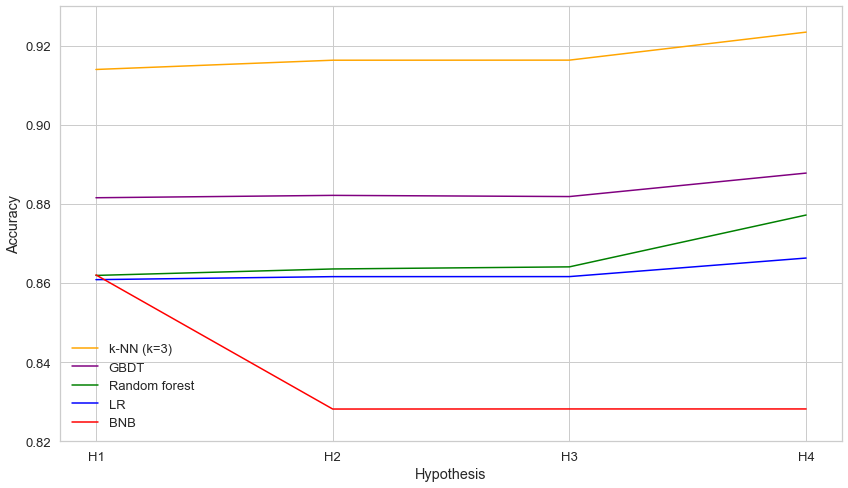

In [258]:
plt.figure(figsize=(14,8))
sns.set(style= 'whitegrid', font_scale=1.2)
plt.ylim(0.82, 0.93)
sns.set(style='whitegrid')
plt.style.use('seaborn-whitegrid')


sns.lineplot( y=result_plot['kNN_3'] , x= result_plot['Hypothesis'], color="orange", label="k-NN (k=3)" )
sns.lineplot( y=result_plot['GBDT_full'] , x= result_plot['Hypothesis'], color="purple", label="GBDT" )
sns.lineplot( y=result_plot['RF'] , x= result_plot['Hypothesis'], color="green", label="Random forest" )
sns.lineplot( y=result_plot['LR'] , x= result_plot['Hypothesis'],color="blue", label="LR")
sns.lineplot( y=result_plot['BNB'] , x= result_plot['Hypothesis'], color="red", label="BNB" )


#plt.title("Prediction models accuracy", fontsize=19)
plt.ylabel("Accuracy")
plt.legend(fontsize=13, facecolor="white", fancybox=True)
 
#sns.plt.show()
